In [ ]:
import pandas as pd

### 1- Veri Yükleme ve Özelliklerin Seçimi

In [ ]:
# Veriyi yükleme
df = pd.read_csv("https://raw.githubusercontent.com/zaferdemirkol/HerkesIcinYapayZeka/main/Advertising.csv")

In [ ]:
# Özellikler (X) ve hedef değişken (y) seçimi
# # Hedef değişken (sales) ile bağımsız değişkenleri (TV, radio, newspaper) ayırma
X = df.drop('sales',axis=1) # 'sales' bağımlı değişken olduğu için, sales sütununu çıkararak X'i oluştur
# Böylece X dataframe'de satışlar (sales) hariç bütün özellikler (TV, radio, gazete harcamaları) yer alır
y = df['sales'] # Tahmin edilmek istenen bağımlı değişken

pd.read_csv: Reklam harcamalarını ve satışları içeren bir veri setini yüklüyoruz. Veri, reklam harcamaları (TV, radyo, gazete) ve satışları içeriyor.
X: TV, radyo ve gazete harcamalarını içeren bağımsız değişkenler
y: Satış değerleri (bağımlı değişken).

### 2- Veriyi Eğitim ve Test Setlerine Bölme

In [ ]:
# X'in boyutunu inceleyelim
from sklearn.model_selection import train_test_split

In [ ]:
# Veriyi %70 eğitim, %30 test olacak şekilde ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

train_test_split: Veriyi ikiye böler:
Eğitim Seti (%70): Modelin öğrenmesi için kullanılır.
Test Seti (%30): Modelin performansını değerlendirmek için kullanılır.
random_state=101: Veri bölünmesinin tekrar edilebilir olması için sabit bir rastgelelik sağlar.

### 3 - Lineer Regresyon Modeli Oluşturma ve Eğitim

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Doğrusal regresyon modeli oluşturma
model = LinearRegression()

In [ ]:
# Modeli eğitim verileriyle eğitme
model.fit(X_train,y_train)
# Fit metoduyla eğitim verileriyle model eğitilir.

LinearRegression()

LinearRegression: Doğrusal regresyon modelini temsil eder.
fit: Modeli, eğitim verilerindeki 𝑋train​ ve 𝑦train değerleriyle eğitir.

### 4 - Test Seti Üzerinde Tahmin ve Başarı Değerlendirmesi

In [ ]:
# Test seti üzerinde tahmin yapma
test_predictions = model.predict(X_test)
# X_test'e uygulanan eğitilmiş modelin tahmin yöntemini kullanarak test verileri için satış tahminlerini tutar.

In [ ]:
print(test_predictions)

[15.74131332 19.61062568 11.44888935 17.00819787  9.17285676  7.01248287
 20.28992463 17.29953992  9.77584467 19.22194224 12.40503154 13.89234998
 13.72541098 21.28794031 18.42456638  9.98198406 15.55228966  7.68913693
  7.55614992 20.40311209  7.79215204 18.24214098 24.68631904 22.82199068
  7.97962085 12.65207264 21.46925937  8.05228573 12.42315981 12.50719678
 10.77757812 19.24460093 10.070269    6.70779999 17.31492147  7.76764327
  9.25393336  8.27834697 10.58105585 10.63591128 13.01002595  9.77192057
 10.21469861  8.04572042 11.5671075  10.08368001  8.99806574 16.25388914
 13.23942315 20.81493419 12.49727439 13.96615898 17.56285075 11.14537013
 12.56261468  5.50870279 23.29465134 12.62409688 18.77399978 15.18785675]


In [ ]:
# Modelin hedef değişkendeki (satışlar) varyansları ne kadar iyi açıkladığını gösteren bir ölçüdür.
# Ancak, tahmin hatalarını doğrudan yansıtmaz.

model.score(X_test, y_test)

0.9185780903322445

In [ ]:
# Başarı değerlendirme metrikleri
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
import numpy as np

MAE = mean_absolute_error(y_test,test_predictions) # Ortalama mutlak hata
MSE = mean_squared_error(y_test,test_predictions) # Ortalama kare hata
RMSE = np.sqrt(MSE) # Kök ortalama kare hata

In [ ]:
print("MAE:", MAE)

1.213745773614481

In [ ]:
print("MSE:", MSE)

2.2987166978863796

In [ ]:
print("RMSE:", RMSE)

1.5161519375993884

In [ ]:
df['sales'].mean()

14.0225

### Polinom Regresyon: Basit Bir Örnek

Polinom regresyon, bağımsız değişkenlerin (X) daha yüksek dereceli terimlerini (x², x³ vb.) modele ekleyerek doğrusal olmayan ilişkileri modellemek için kullanılan bir tekniktir.

##### Çok Özellikli Polinom Regresyon: 

Birden fazla bağımsız değişken varsa, her bir değişkenin daha yüksek dereceleri ve çapraz terimleri (ör. 𝑥1 . 𝑥2) de dahil edilir. Bu, veri setindeki karmaşık ilişkileri öğrenmede avantaj sağlar.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures: Veri setindeki değişkenlere polinom terimler ekleyerek yeni özellikler oluşturur.

# Örnek veriler: Günlere göre harcamalar
veriler = pd.DataFrame({'gün': [1, 2, 3, 4, 5], 'harcama': [100, 150, 200, 300, 400]})

# Bağımsız değişkenler ve bağımlı değişken
X = veriler[['gün']] # Bağımsız değişken (gün) olarak belirlenir.
y = veriler['harcama'] # Bağımlı değişken (harcama) olarak belirlenir.

# Polinom özellikler oluşturma (2. derece)
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
X_poly = polynomial_converter.fit_transform(X)

# Polinom regresyon modeli oluşturma ve eğitme
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y)

# Tahmin yapma
y_pred = model.predict(X_poly)

# Görselleştirme
import matplotlib.pyplot as plt
plt.scatter(X, y, label="Gerçek Veriler")
plt.plot(X, y_pred, color='red', label="2. Dereceden Polinom")
plt.xlabel('Gün')
plt.ylabel('Harcama')
plt.legend()
plt.show()


In [ ]:
quartet = pd.read_csv('anscombes_quartet1.csv')

In [ ]:
quartet

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


In [ ]:
def model_olustur(x,y):
		model_quartet1 = LinearRegression()
		X_q1=x
		y_q1=y
		model_quartet1.fit(X_q1, y_q1)
		print(model_quartet1.coef_)
		print(model_quartet1.intercept_)
		MAE = mean_absolute_error(y_q1,model_quartet1.predict(X_q1))
		MSE = mean_squared_error(y_q1,model_quartet1.predict(X_q1))
		print(MAE)
		print(MSE)

In [ ]:
model_olustur(quartet[["x"]], quartet["y"])

[0.50009091]
3.0000909090909094
0.837404958677686
1.2511536363636366


In [ ]:
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

<Axes: xlabel='x', ylabel='y'>

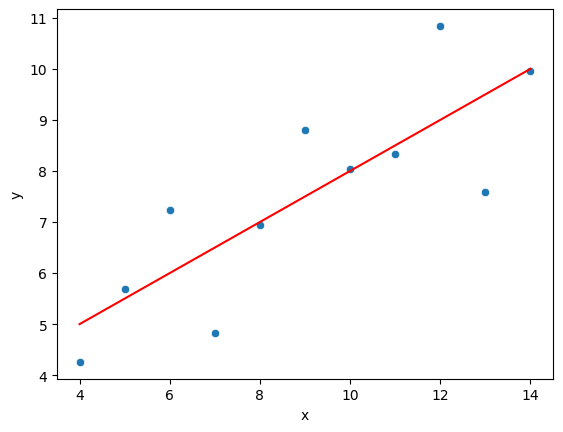

In [ ]:
import seaborn as sns
sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')

<Axes: xlabel='residual', ylabel='Density'>

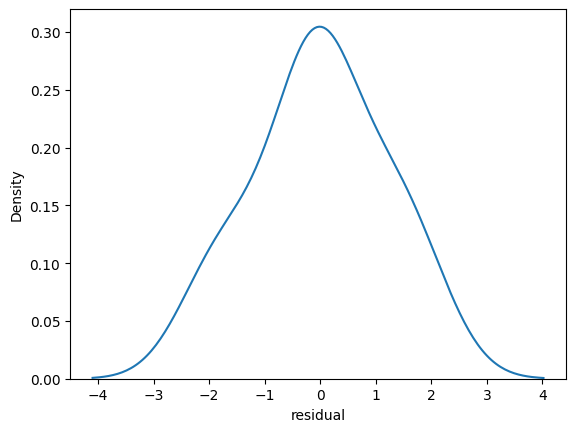

In [ ]:
sns.kdeplot(quartet['residual'])

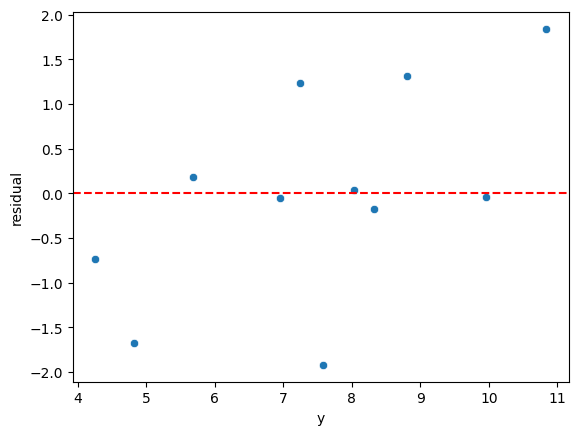

In [ ]:
import matplotlib.pyplot as plt

sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
quartet = pd.read_csv('anscombes_quartet2.csv')

In [ ]:
model_olustur(quartet[["x"]], quartet["y"])


[0.5]
3.00090909090909
0.9679338842975209
1.2523900826446281


In [ ]:
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

<Axes: xlabel='x', ylabel='y'>

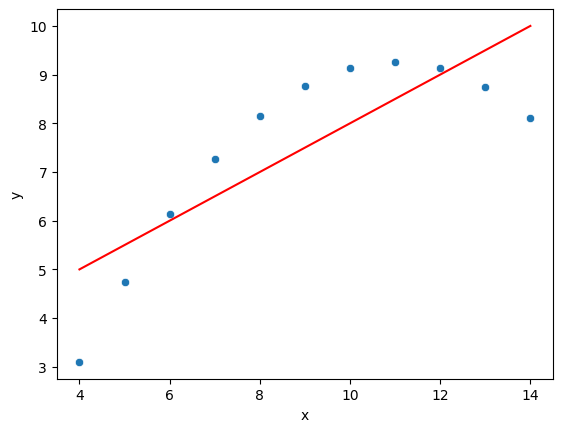

In [ ]:
sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')

<Axes: xlabel='residual', ylabel='Density'>

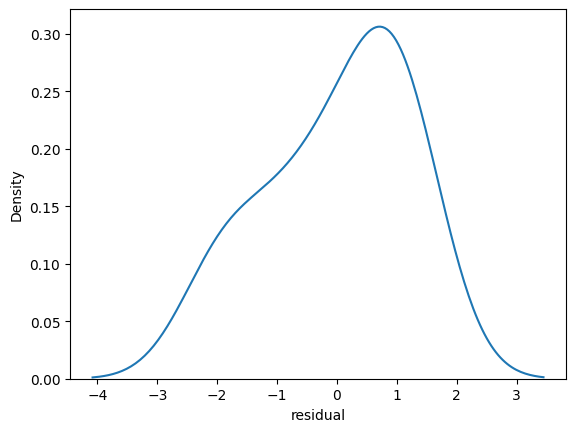

In [ ]:
sns.kdeplot(quartet['residual'])

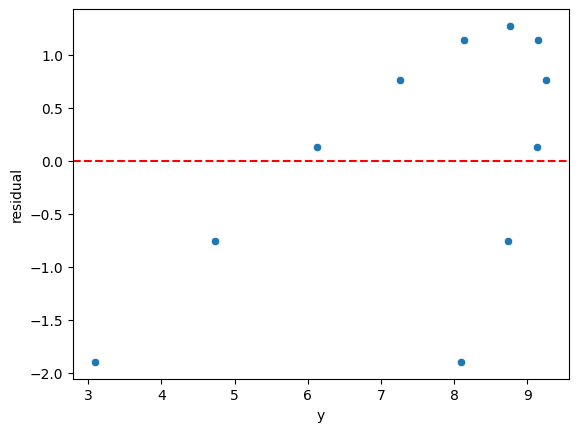

In [ ]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
quartet = pd.read_csv('anscombes_quartet4.csv')

In [ ]:
model_olustur(quartet[["x"]], quartet["y"])

[0.49990909]
3.0017272727272726
0.902727272727273
1.249317272727273


In [ ]:
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

<Axes: xlabel='x', ylabel='y'>

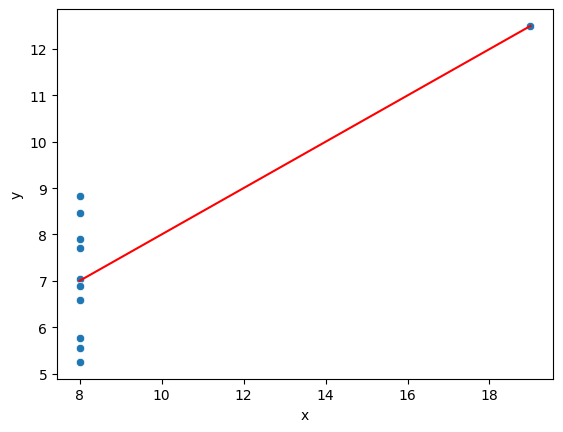

In [ ]:
sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')

<Axes: xlabel='residual', ylabel='Density'>

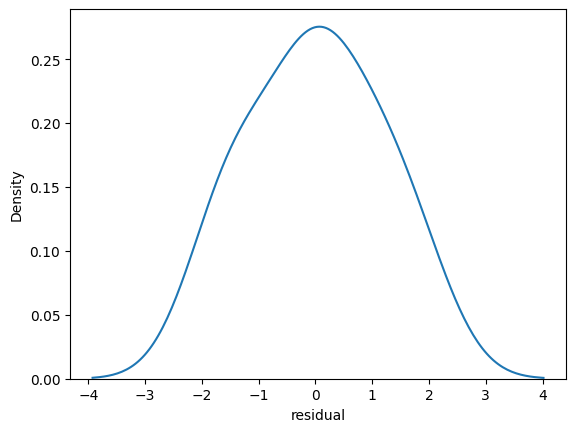

In [ ]:
sns.kdeplot(quartet['residual'])

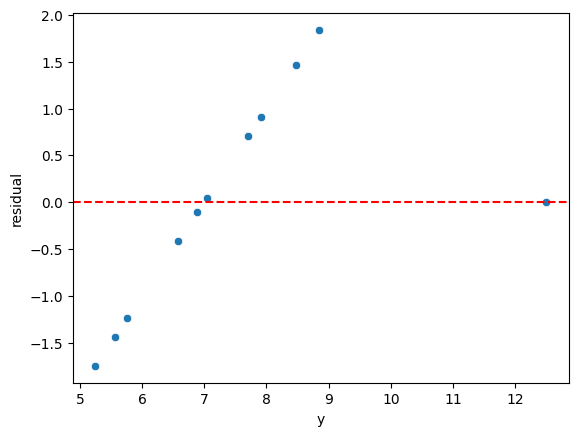

In [ ]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
test_res = y_test - test_predictions

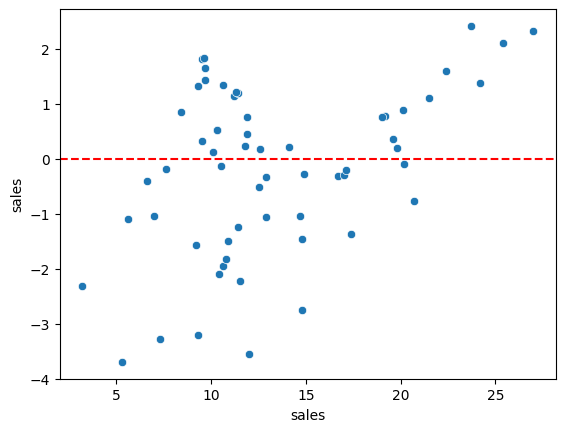

In [ ]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='sales', ylabel='Density'>

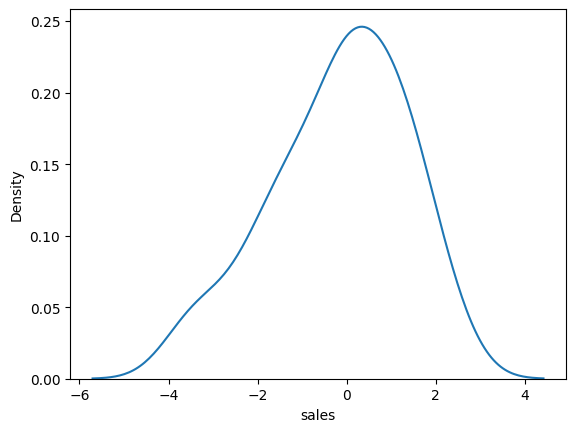

In [ ]:
sns.kdeplot(test_res)

In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(X,y)

LinearRegression()

In [ ]:
y_hat = final_model.predict(X)

Text(0.5, 1.0, 'newspaper Spend')

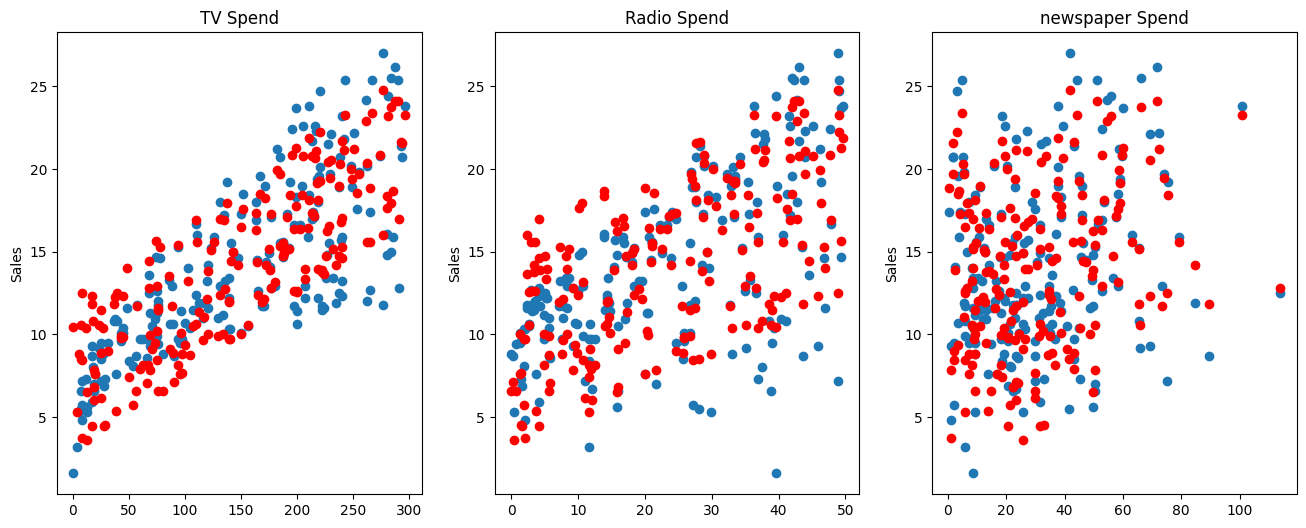

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")


axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")


axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_ylabel("Sales")
axes[2].set_title("newspaper Spend")

In [ ]:
residuals = y_hat - y

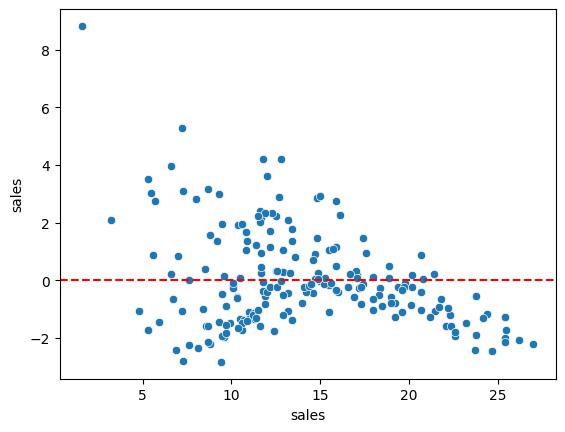

In [ ]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [ ]:
df.corr().T

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
campaign = [[149,22,12]]

In [ ]:
final_model.predict(campaign)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [ ]:
from joblib import dump, load

In [ ]:
dump(final_model, "sales_model.joblib")

['sales_model.joblib']

In [ ]:
loaded_model = load("sales_model.joblib")

In [ ]:
loaded_model.predict(campaign)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

# Polynom Regresyon

In [ ]:
veriler=pd.read_csv("masraflar.csv")
veriler

,gün,harcama
0,1,105.202483
1,1,100.092284
2,1,101.334453
3,1,105.322253
4,2,107.028516
...,...,...
95,28,244.718525
96,29,244.300731
97,29,240.680163
98,29,245.123951


In [ ]:
x=veriler["gün"]
y=veriler["harcama"]

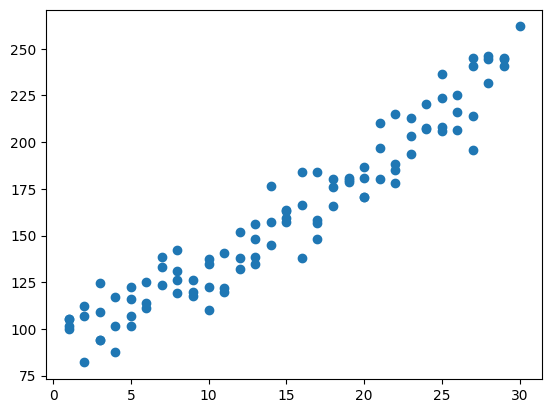

In [ ]:
plt.scatter(x, y, label='Gerçek Veriler')

In [ ]:
coefficients = np.polyfit(x, y, 2)

In [ ]:
polynomial = np.poly1d(coefficients)

In [ ]:
y_pred = polynomial(x)

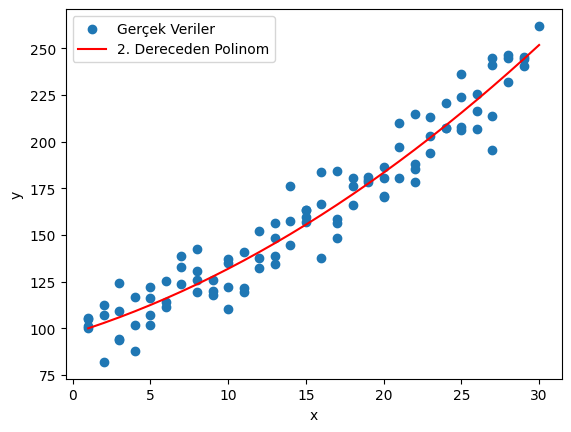

In [ ]:
plt.scatter(x, y, label='Gerçek Veriler')
plt.plot(x, y_pred, color='r', label='2. Dereceden Polinom')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
gun=veriler.iloc[:,0:1]

In [ ]:
Harcama=veriler.iloc[:,1:2]

In [ ]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
LModel=linReg.fit(gun, Harcama)

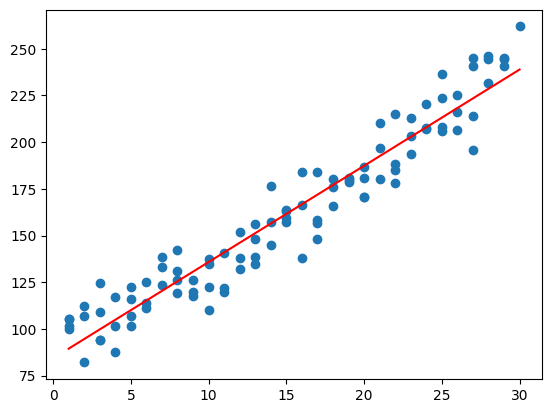

In [ ]:
plt.scatter(gun, Harcama)
plt.plot(gun, LModel.predict(gun), color="red")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
LModel.score(gun, Harcama)

0.9230686703268497

In [ ]:
MAE = mean_absolute_error(y, LModel.predict(gun))
print(MAE)
MSE = mean_squared_error(y,LModel.predict(gun))
print(MSE)
RMSE = np.sqrt(MSE)
print(RMSE)

10.355467888640376
158.40064446527427
12.585731781079488


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polReg=PolynomialFeatures(degree=2,include_bias=False)

In [ ]:
gun

,gün
0,1
1,1
2,1
3,1
4,2
...,...
95,28
96,29
97,29
98,29


In [ ]:
gun_pol=polReg.fit_transform(gun)

In [ ]:
gun_pol

array([[  1.,   1.],
       [  1.,   1.],
       [  1.,   1.],
       [  1.,   1.],
       [  2.,   4.],
       [  2.,   4.],
       [  2.,   4.],
       [  3.,   9.],
       [  3.,   9.],
       [  3.,   9.],
       [  3.,   9.],
       [  4.,  16.],
       [  4.,  16.],
       [  4.,  16.],
       [  5.,  25.],
       [  5.,  25.],
       [  5.,  25.],
       [  5.,  25.],
       [  6.,  36.],
       [  6.,  36.],
       [  6.,  36.],
       [  7.,  49.],
       [  7.,  49.],
       [  7.,  49.],
       [  8.,  64.],
       [  8.,  64.],
       [  8.,  64.],
       [  8.,  64.],
       [  9.,  81.],
       [  9.,  81.],
       [  9.,  81.],
       [ 10., 100.],
       [ 10., 100.],
       [ 10., 100.],
       [ 10., 100.],
       [ 11., 121.],
       [ 11., 121.],
       [ 11., 121.],
       [ 12., 144.],
       [ 12., 144.],
       [ 12., 144.],
       [ 13., 169.],
       [ 13., 169.],
       [ 13., 169.],
       [ 13., 169.],
       [ 14., 196.],
       [ 14., 196.],
       [ 14.,

In [ ]:
linReg2 = LinearRegression()

In [ ]:
linReg2.fit(gun_pol, Harcama)

LinearRegression()

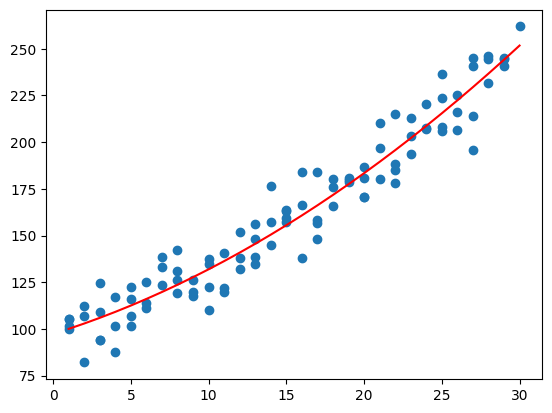

In [ ]:
plt.scatter(gun, Harcama)
plt.plot(gun, linReg2.predict(gun_pol), color="red")

In [ ]:
linReg2.score(gun_pol, Harcama)

0.9372742300738232

In [ ]:
MAE = mean_absolute_error(y, linReg2.predict(gun_pol))
print(MAE)
MSE = mean_squared_error(y,linReg2.predict(gun_pol))
print(MSE)
RMSE = np.sqrt(MSE)
print(RMSE)

9.248393806066822
129.15157482783772
11.364487442372301


In [ ]:
10.355467888640376
158.40064446527427
12.585731781079488

12.585731781079488

# Çok özellikli polynom reg

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/zaferdemirkol/HerkesIcinYapayZeka/main/Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
X = df.drop('sales',axis=1)
y = df['sales']

In [ ]:
X.shape

(200, 3)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [ ]:
poly_features = polynomial_converter.fit_transform(X)

In [ ]:
poly_features.shape

(200, 9)

[x1, x2, x3]

Bu dizinin 2. dereceden çıktısı
[x1, x2, x3, x1^2, x1*x2, x1*x3, x2^2, x2*x3, x3^2]




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
model.score(X_test, y_test)

0.9843529333146783

score:0.91

MAE: 1.21

MSE: 2.30

RMSE: 1.51


0.4896798044803838

0.4417505510403753

0.6646431757269274




In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [ ]:
print(MAE)
print(MSE)
print(RMSE)

0.4896798044803838
0.4417505510403753
0.6646431757269274


In [ ]:

train_rmse_errors = []
test_rmse_errors = []


for d in range(1,10):

    polynomial_converter = PolynomialFeatures(degree=d)
    poly_features = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)


In [ ]:
train_rmse_errors

[1.7345941243293763,
 0.5879574085292232,
 0.43393443569020695,
 0.4694922471298414,
 0.2713464014515512,
 0.3257322809772321,
 1.4199033004300772,
 0.1507718770949452,
 0.17201683905806586]

In [ ]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757268184,
 0.5803286825152026,
 1.2579853106883574,
 3.300531153346747,
 1.37304861586185,
 515.0836822313825,
 4160.749548015732,
 92953.36913739244]

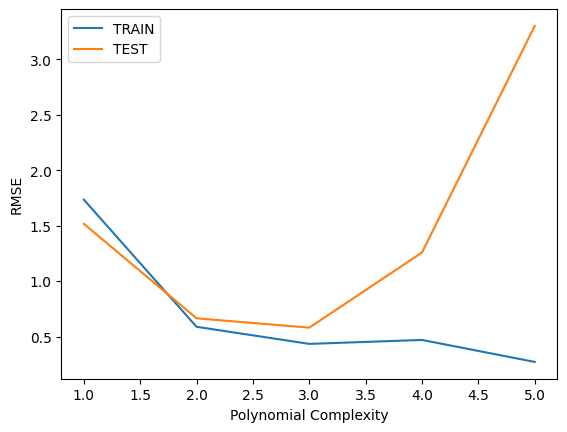

In [ ]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [ ]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

In [ ]:
from joblib import dump, load

In [ ]:
dump(final_model, 'sales_poly_model.joblib')

['sales_poly_model.joblib']

In [ ]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

In [ ]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [ ]:
campaign = [[149,22,12]]

In [ ]:
campaign_poly = loaded_poly.transform(campaign)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
loaded_model.predict(campaign_poly)

array([14.64501014])

# L1, L2 Düzeltimler (Cezalandırmalar)

In [ ]:
plt.figure(figsize=(10,7))

x = np.array([105,118,120,126,133,135, 135])
y = np.array([208,220,215,228,228,223,235])
m, b = np.polyfit(x, y, 1)

<Figure size 1000x700 with 0 Axes>

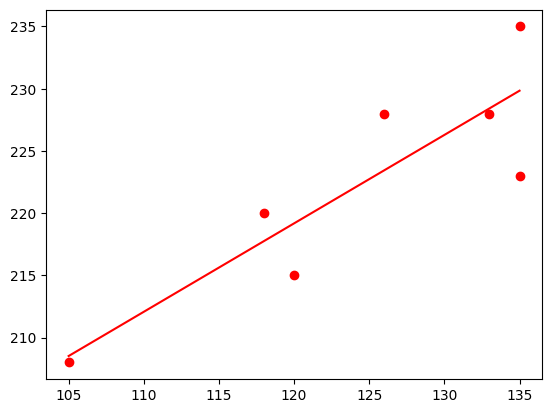

In [ ]:
plt.plot(x,y, "ro")
plt.plot(x, m*x+b,"r")

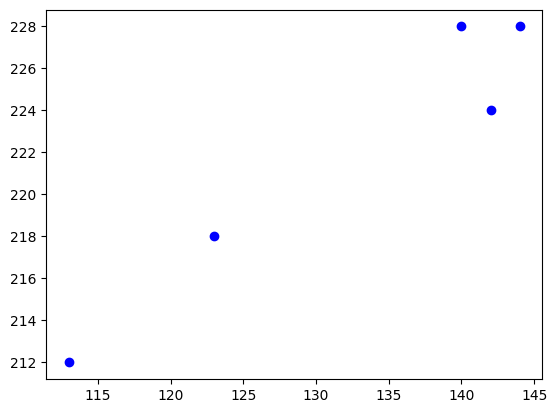

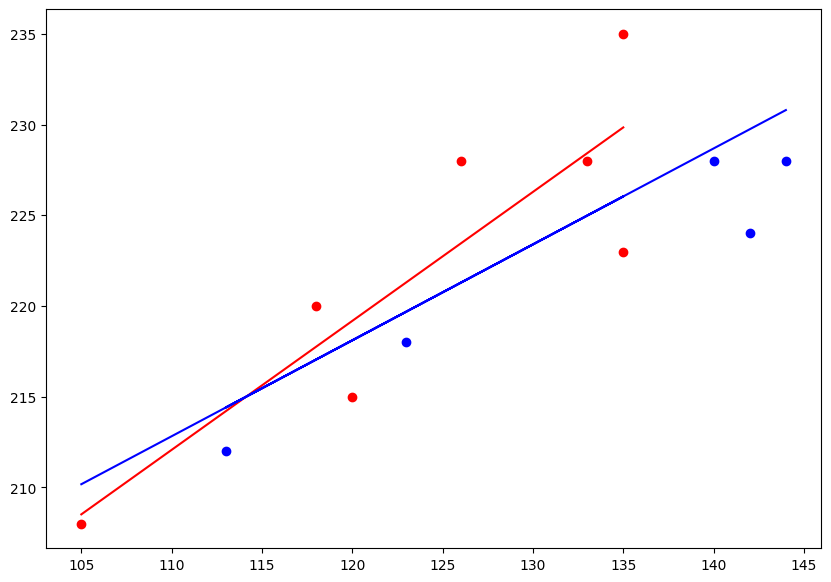

In [ ]:

plt.figure(figsize=(10,7))

x = np.array([105,118,120,126,133,135, 135])
y = np.array([208,220,215,228,228,223,235])
m, b = np.polyfit(x, y, 1)



plt.plot(x,y, "ro")
plt.plot(x, m*x+b,"r")



x2 = np.array([113,123,140,142,144])
y2 = np.array([212,218,228, 224,228])
plt.plot(x2,y2, "bo")



xt = np.array([105,118,120,126,133,135, 135, 113,123,140,142,144])
yt = np.array([208,220,215,228,228,223,235,212,218,228, 224,228])
m2, b2 = np.polyfit(xt,yt, 1)
plt.plot(xt, m2*xt+b2,"b")

In [ ]:
X = x.reshape(-1, 1)
y = y.reshape(-1, 1)
X_test=x2.reshape(-1, 1)
y2=y2.reshape(-1,1)
xt=xt.reshape(-1,1)
yt=yt.reshape(-1,1)

In [ ]:
reg = LinearRegression()
model = reg.fit(X, y)

In [ ]:
print("intercept: ", model.intercept_)
print("coef: ", model.coef_)

intercept:  [133.89697909]
coef:  [[0.71068939]]


In [ ]:
predict = model.predict(X)

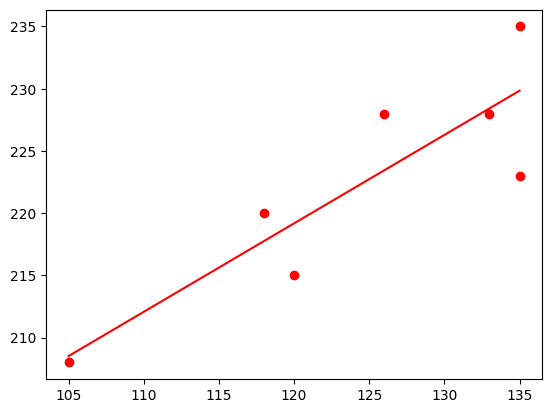

In [ ]:
plt.plot(X,y, "ro")
plt.plot(X, predict,"r")

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
train_predictions = model.predict(X)
MAE = mean_absolute_error(y,train_predictions)
MAE

3.4165099037291133

In [ ]:
test_predictions = model.predict(X_test)
MAE = mean_absolute_error(y2,test_predictions)
MAE

5.992254066615021

In [ ]:
total_predictions = model.predict(xt)
MAE = mean_absolute_error(yt,total_predictions)
MAE

4.489736638264908

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rmodel=Ridge(alpha=1000).fit(X, y)

In [ ]:
print("intercept: ", rmodel.intercept_)
print("coef: ", rmodel.coef_)

intercept:  [184.84413022]
coef:  [[0.30170996]]


In [ ]:
intercept:  [133.89697909]
coef:  [[0.71068939]]

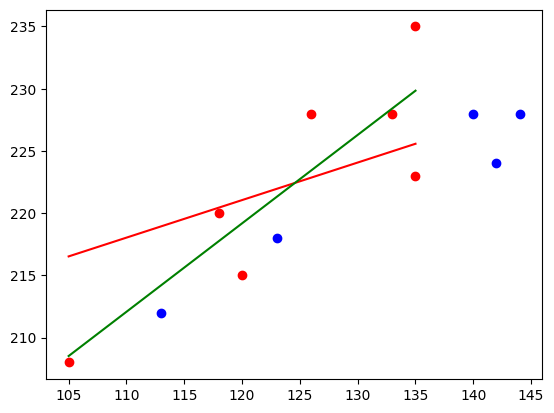

In [ ]:
rpredict = rmodel.predict(X)
plt.plot(X,y, "ro")
plt.plot(X, rpredict,"r")
plt.plot(X, predict,"g")
plt.plot(x2, y2,"bo")

In [ ]:
rtrain_predictions = rmodel.predict(X)
MAE = mean_absolute_error(y,rtrain_predictions)
MAE

5.026823883121149

In [ ]:
rtest_predictions = rmodel.predict(X_test)
MAE = mean_absolute_error(y2,rtest_predictions)
MAE

3.1571193686287415

In [ ]:
rtotal_predictions = rmodel.predict(xt)
MAE = mean_absolute_error(yt,rtotal_predictions)
MAE

4.247780335415979


## Linear Train MAE: 3.4165099037291133

## Lineer Test MAE: 5.992254066615021

## Lineer Total MAE: 4.489736638264908


## Ridge  Train MAE: 5.026823883121149
## Ridge  Test MAE: 3.1571193686287415
## Ridge Total MAE: 4.247780335415979